In [2]:
#Importing libraries
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# QUESTION 1

In [3]:
# Opening dataset
afghanistan = xr.open_mfdataset('/home/benedict/julitta/afghanistan/*.nc')
afghanistan

<xarray.Dataset>
Dimensions:   (lon: 60, lat: 38, datetime: 4018)
Coordinates:
  * lon       (lon) float32 60.25 60.5 60.75 61.0 ... 74.25 74.5 74.75 75.0
  * lat       (lat) float32 38.75 38.5 38.25 38.0 ... 30.25 30.0 29.75 29.5
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2012-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 38, 60), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [4]:
# Slicing the longitude and latitude
afghan = afghanistan.sel(datetime=slice("2002","2012"),lon=(67.75),lat=(33.25))
afghan

<xarray.Dataset>
Dimensions:   (datetime: 4018)
Coordinates:
    lon       float32 67.75
    lat       float32 33.25
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2012-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime) float32 dask.array<chunksize=(365,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [5]:
afghan_precip = afghan['precip']
afghan_precip

<xarray.DataArray 'precip' (datetime: 4018)>
dask.array<getitem, shape=(4018,), dtype=float32, chunksize=(366,), chunktype=numpy.ndarray>
Coordinates:
    lon       float32 67.75
    lat       float32 33.25
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2012-12-31
Attributes:
    grid_mapping:  crs

In [6]:
monthly_rainfall = afghan_precip.resample(datetime='1M').sum('datetime')
monthly_rainfall

,Array,Chunk
Bytes,528 B,4 B
Shape,"(132,)","(1,)"
Count,836 Tasks,132 Chunks
Type,float32,numpy.ndarray


In [7]:
monthly_climatology = monthly_rainfall.groupby('datetime.month').mean()
monthly_climatology

<xarray.DataArray 'precip' (month: 12)>
dask.array<stack, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 67.75
    lat      float32 33.25
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

# QUESTION 2

In [8]:
annual_total = afghan_precip.resample(datetime='1Y').sum()
annual_total

<xarray.DataArray 'precip' (datetime: 11)>
dask.array<stack, shape=(11,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * datetime  (datetime) datetime64[ns] 2002-12-31 2003-12-31 ... 2012-12-31
    lon       float32 67.75
    lat       float32 33.25

In [9]:
annual_average = annual_total.groupby('datetime.month').mean()
annual_average

<xarray.DataArray 'precip' (month: 1)>
dask.array<stack, shape=(1,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 67.75
    lat      float32 33.25
  * month    (month) int64 12

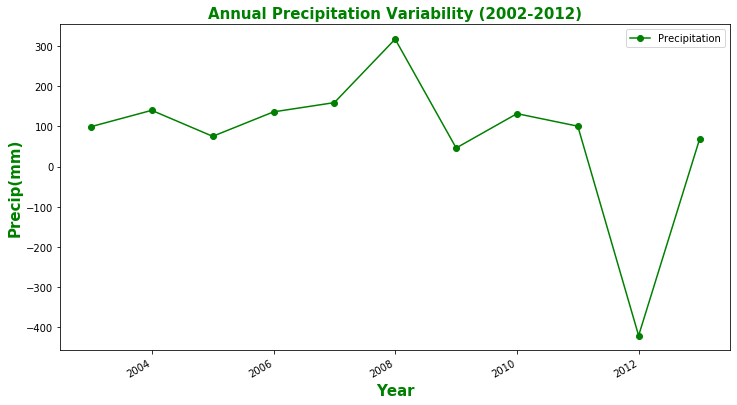

In [10]:
fig, ax = plt.subplots(figsize = (12,6))
plt.subplots_adjust(hspace = 0.4, wspace = 0.2)
annual_total.plot(color = 'green', lw = 1.5, marker = 'o', markersize = '6',label='Precipitation')
ax.set_title('Annual Precipitation Variability (2002-2012)',fontweight = 'bold', fontsize = 15,color = 'green')
ax.set_xlabel('Year', fontweight = 'bold', fontsize = 15,color = 'green')
ax.set_ylabel('Precip(mm)', fontweight = 'bold', fontsize = 15,color = 'green')
plt.legend()
plt.show()

# QUESTION 3

In [11]:
afghanistan_1 = xr.open_mfdataset('/home/benedict/julitta/afghanistan/*.nc')
afghanistan_1

<xarray.Dataset>
Dimensions:   (lon: 60, lat: 38, datetime: 4018)
Coordinates:
  * lon       (lon) float32 60.25 60.5 60.75 61.0 ... 74.25 74.5 74.75 75.0
  * lat       (lat) float32 38.75 38.5 38.25 38.0 ... 30.25 30.0 29.75 29.5
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2012-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 38, 60), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [12]:
afghan_1 = afghanistan_1.sel(datetime=slice("2003","2012"),lon=(67.75),lat=(33.25))
afghan_1

<xarray.Dataset>
Dimensions:   (datetime: 3653)
Coordinates:
    lon       float32 67.75
    lat       float32 33.25
  * datetime  (datetime) datetime64[ns] 2003-01-01 2003-01-02 ... 2012-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime) float32 dask.array<chunksize=(365,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [13]:
afghan_precip1 = afghanistan_1['precip']
afghan_precip1

<xarray.DataArray 'precip' (datetime: 4018, lat: 38, lon: 60)>
dask.array<concatenate, shape=(4018, 38, 60), dtype=float32, chunksize=(366, 38, 60), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 60.25 60.5 60.75 61.0 ... 74.25 74.5 74.75 75.0
  * lat       (lat) float32 38.75 38.5 38.25 38.0 ... 30.25 30.0 29.75 29.5
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2012-12-31
Attributes:
    grid_mapping:  crs

## NUMBER OF DRY DAYS PER YEAR

In [14]:
ds = afghan_precip1
dry_days_year = (ds < 1).groupby('datetime.year').sum(dim='datetime')
dry_days_year

<xarray.DataArray 'precip' (year: 11, lat: 38, lon: 60)>
dask.array<stack, shape=(11, 38, 60), dtype=int64, chunksize=(1, 38, 60), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 60.25 60.5 60.75 61.0 61.25 ... 74.25 74.5 74.75 75.0
  * lat      (lat) float32 38.75 38.5 38.25 38.0 37.75 ... 30.25 30.0 29.75 29.5
  * year     (year) int64 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012

/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently re

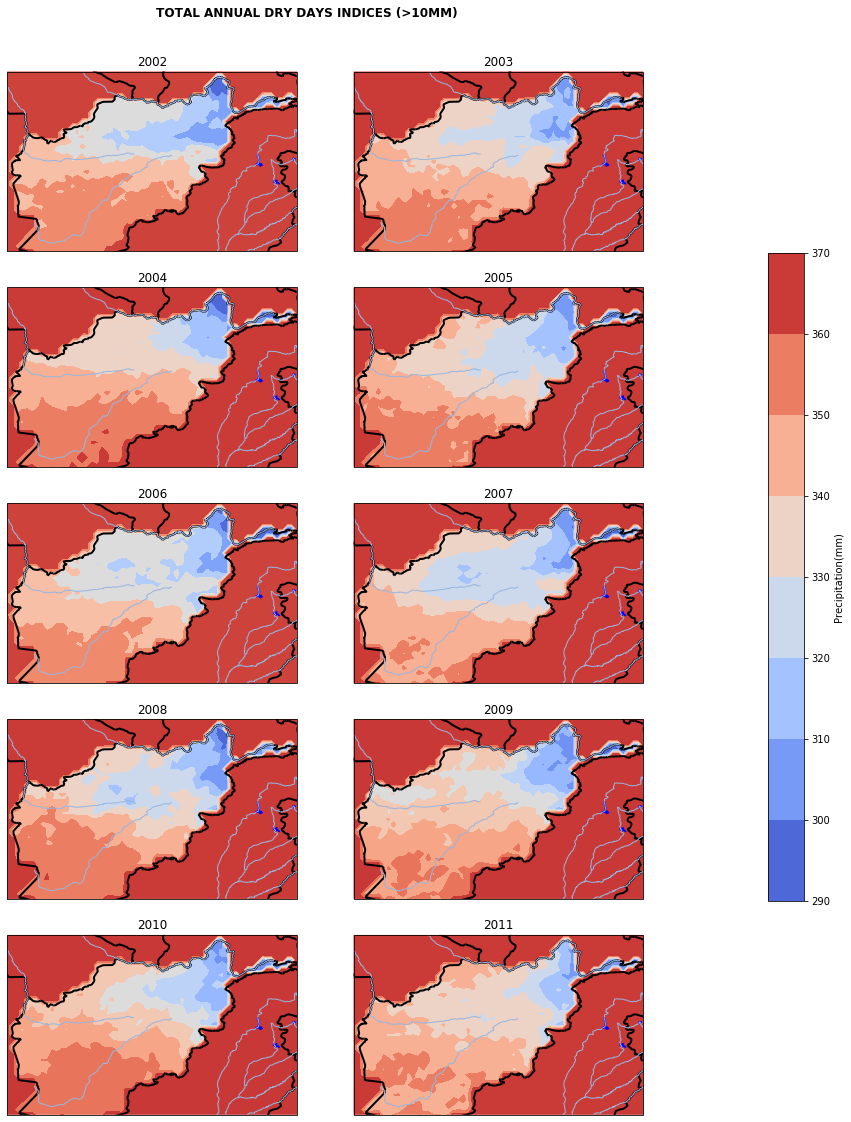

In [15]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names=['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([60.25,74.75,29.75,38.75], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(dry_days_year.lon,dry_days_year.lat,dry_days_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL DRY DAYS INDICES (>10MM)', fontweight='bold');

## NUMBER OF WET DAYS PER YEAR

In [16]:
wet = afghan_precip1
wet_days_year = (wet >= 1).groupby('datetime.year').sum(dim='datetime')
wet_days_year

<xarray.DataArray 'precip' (year: 11, lat: 38, lon: 60)>
dask.array<stack, shape=(11, 38, 60), dtype=int64, chunksize=(1, 38, 60), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 60.25 60.5 60.75 61.0 61.25 ... 74.25 74.5 74.75 75.0
  * lat      (lat) float32 38.75 38.5 38.25 38.0 37.75 ... 30.25 30.0 29.75 29.5
  * year     (year) int64 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012

/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently re

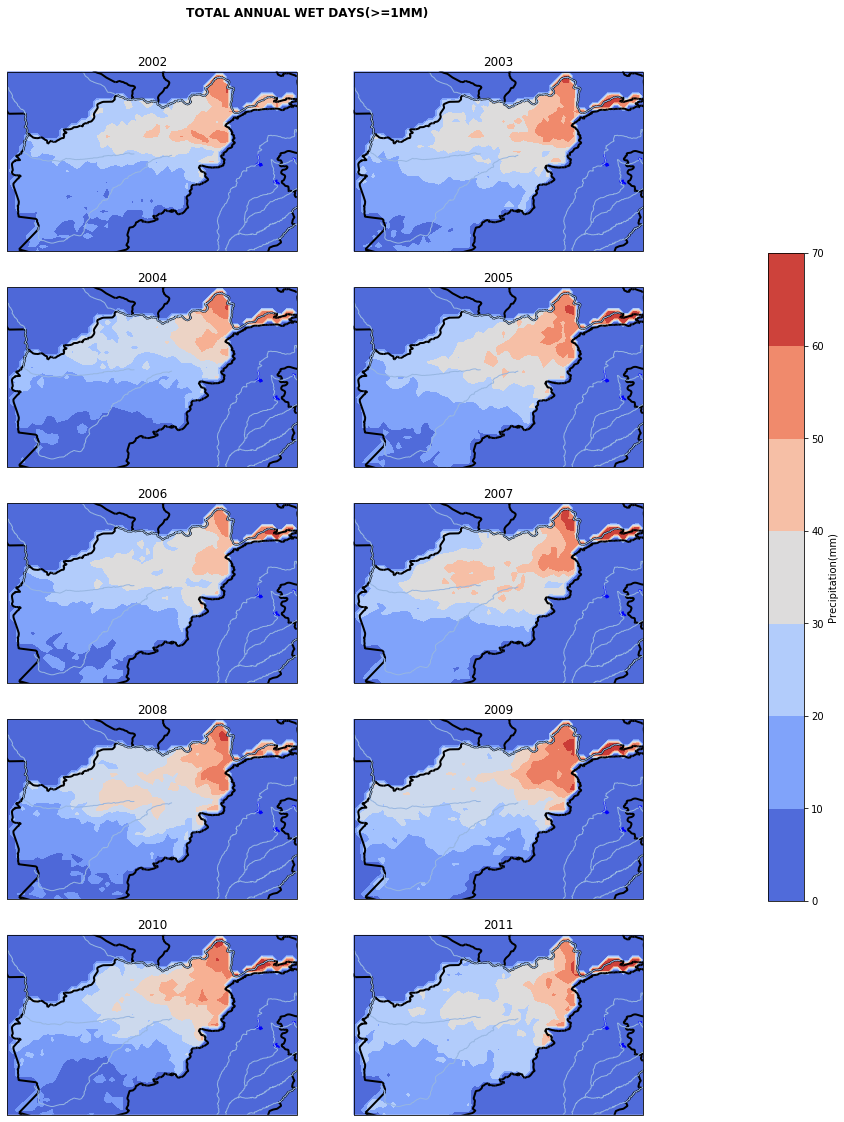

In [17]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names=['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([60.25,74.75,29.75,38.75], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_year.lon,wet_days_year.lat,wet_days_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS(>=1MM)', fontweight='bold');

## NUMBER OF DRY DAYS PER MONTH

In [18]:
wet_days_month1= (wet>1).groupby('datetime.month').sum(dim='datetime')
wet_days_month1

<xarray.DataArray 'precip' (month: 12, lat: 38, lon: 60)>
dask.array<stack, shape=(12, 38, 60), dtype=int64, chunksize=(1, 38, 60), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 60.25 60.5 60.75 61.0 61.25 ... 74.25 74.5 74.75 75.0
  * lat      (lat) float32 38.75 38.5 38.25 38.0 37.75 ... 30.25 30.0 29.75 29.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently re

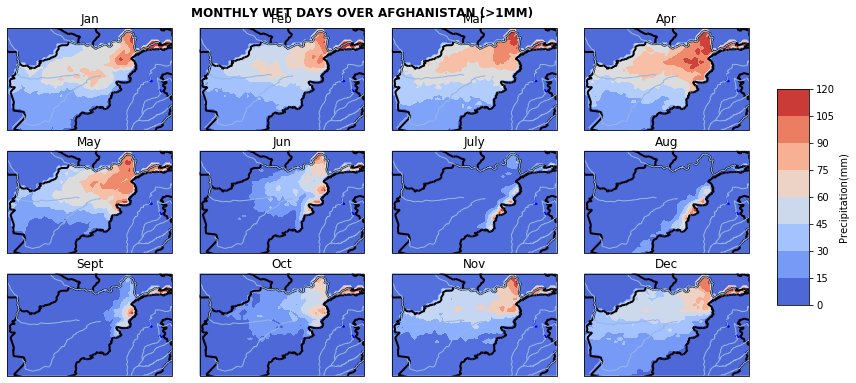

In [23]:
fig,ax=plt.subplots(3,4,figsize=(18,6),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([60.25,74.75,29.75,38.75], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_month1.lon,wet_days_month1.lat,wet_days_month1[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY WET DAYS OVER AFGHANISTAN (>1MM)', fontweight='bold');

In [25]:
dry_days_month2= (ds<1).groupby('datetime.month').sum(dim='datetime')
dry_days_month2

<xarray.DataArray 'precip' (month: 12, lat: 38, lon: 60)>
dask.array<stack, shape=(12, 38, 60), dtype=int64, chunksize=(1, 38, 60), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 60.25 60.5 60.75 61.0 61.25 ... 74.25 74.5 74.75 75.0
  * lat      (lat) float32 38.75 38.5 38.25 38.0 37.75 ... 30.25 30.0 29.75 29.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently re

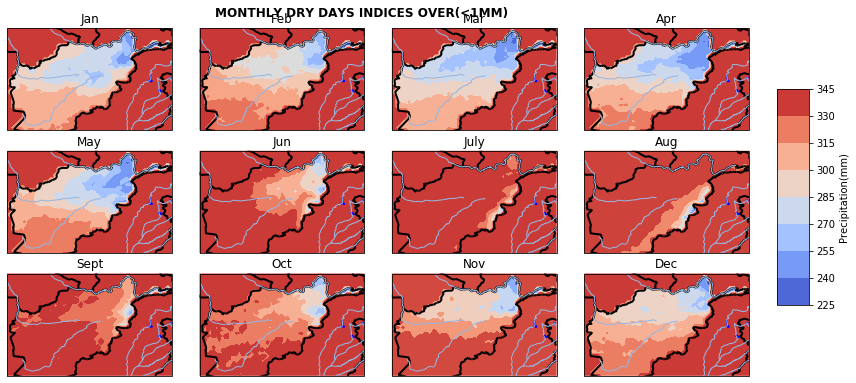

In [27]:
fig,ax=plt.subplots(3,4,figsize=(18,6),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([60.25,74.75,29.75,38.75], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(dry_days_month2.lon,dry_days_month2.lat,dry_days_month2[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY DRY DAYS INDICES OVER(<1MM)', fontweight='bold');

## QUESTION 4

In [43]:
wet_days_year1 = (wet>10).groupby('datetime.year').sum(dim='datetime')
wet_days_year1

<xarray.DataArray 'precip' (year: 11, lat: 38, lon: 60)>
dask.array<stack, shape=(11, 38, 60), dtype=int64, chunksize=(1, 38, 60), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 60.25 60.5 60.75 61.0 61.25 ... 74.25 74.5 74.75 75.0
  * lat      (lat) float32 38.75 38.5 38.25 38.0 37.75 ... 30.25 30.0 29.75 29.5
  * year     (year) int64 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012

/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently re

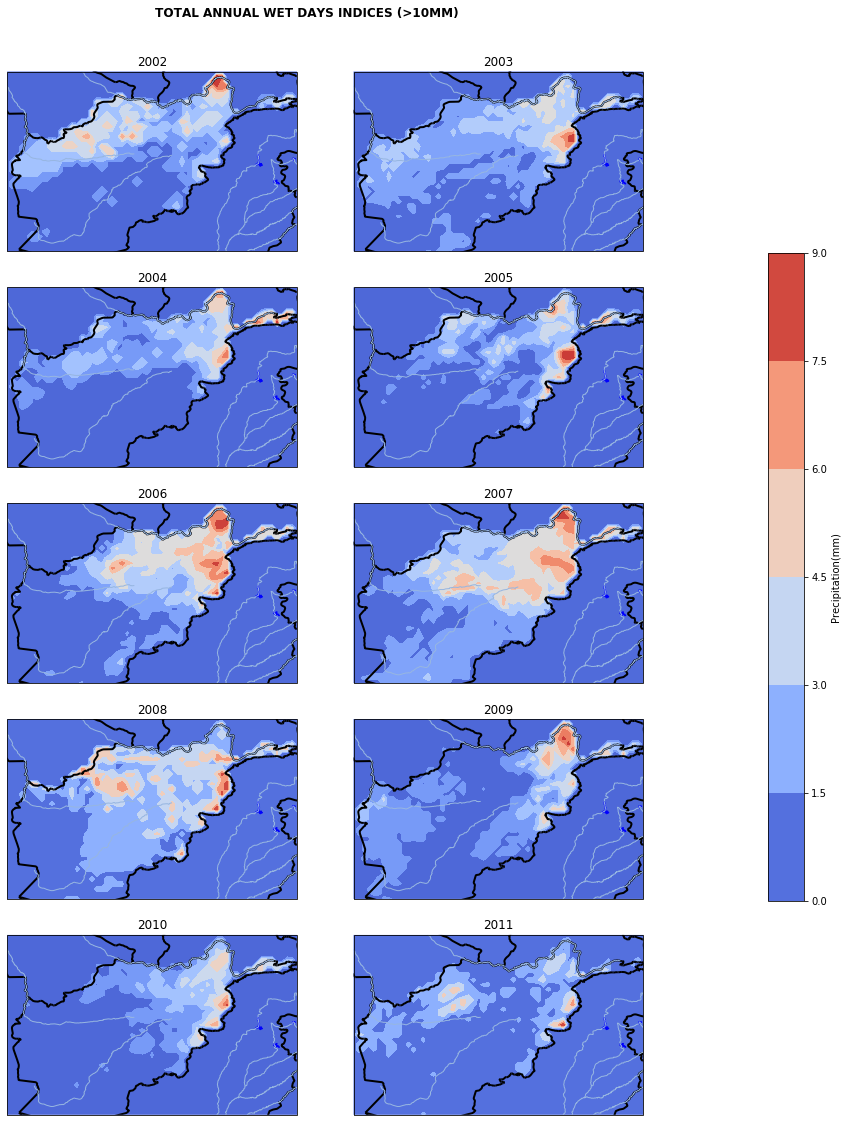

In [44]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names=['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([60.25,74.75,29.75,38.75], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_year1.lon,wet_days_year1.lat,wet_days_year1[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS INDICES (>10MM)', fontweight='bold');

In [45]:
wet_days_year2 = (wet>20).groupby('datetime.year').sum(dim='datetime')
wet_days_year2

<xarray.DataArray 'precip' (year: 11, lat: 38, lon: 60)>
dask.array<stack, shape=(11, 38, 60), dtype=int64, chunksize=(1, 38, 60), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 60.25 60.5 60.75 61.0 61.25 ... 74.25 74.5 74.75 75.0
  * lat      (lat) float32 38.75 38.5 38.25 38.0 37.75 ... 30.25 30.0 29.75 29.5
  * year     (year) int64 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012

In [46]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names=['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([0.5, 15, 4.5,24], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_year2.lon,wet_days_year2.lat,wet_days_year2[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([60.25,74.75,29.75,38.75])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS INDICES (>20MM)', fontweight='bold');

/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/benedict/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently re

ValueError: Image size of 129153x146952 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x1296 with 11 Axes>

## QUSETION 3 TIMESRIES

In [47]:
afghanistan_2 = xr.open_mfdataset('/home/benedict/julitta/afghanistan/*.nc')
afghanistan_2

<xarray.Dataset>
Dimensions:   (lon: 60, lat: 38, datetime: 4018)
Coordinates:
  * lon       (lon) float32 60.25 60.5 60.75 61.0 ... 74.25 74.5 74.75 75.0
  * lat       (lat) float32 38.75 38.5 38.25 38.0 ... 30.25 30.0 29.75 29.5
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2012-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 38, 60), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [48]:
afghan_data = afghanistan_2.sel(datetime=slice("2002","2012"),lon=(67.75),lat=(33.25))
afghan_data

<xarray.Dataset>
Dimensions:   (datetime: 4018)
Coordinates:
    lon       float32 67.75
    lat       float32 33.25
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2012-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime) float32 dask.array<chunksize=(365,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [49]:
ddays_annual = (afghan_data['precip']< 1).resample(datetime='1Y').sum()
wdays_annual = (afghan_data['precip']>=1).resample(datetime='1Y').sum()

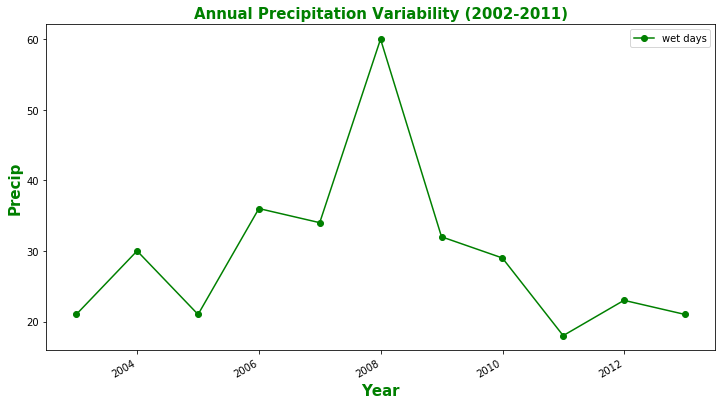

In [52]:
wdays_annual = (afghan_data['precip']>=1).resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize = (12,6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wdays_annual.plot(color = 'green', lw = 1.5, marker = 'o', markersize = '6',label='wet days')
ax.set_title('Annual Precipitation Variability (2002-2011)',fontweight = 'bold', fontsize = 15,color='green')
ax.set_xlabel('Year', fontweight = 'bold', fontsize = 15,color='green')
ax.set_ylabel('Precip', fontweight = 'bold', fontsize = 15,color='green')
plt.legend()
plt.show()

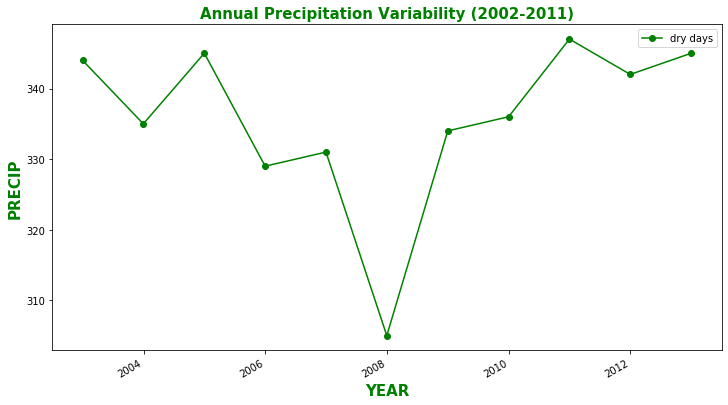

In [53]:
ddays_annual = (afghan_data['precip']< 1).resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize = (12,6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
ddays_annual.plot(color = 'green', lw = 1.5, marker = 'o', markersize = '6',label='dry days')
ax.set_title('Annual Precipitation Variability (2002-2011)',fontweight = 'bold', fontsize = 15,color='green')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color='green')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15,color='green')
plt.legend()
plt.show()

## QUESTION 4 TIMESERIES

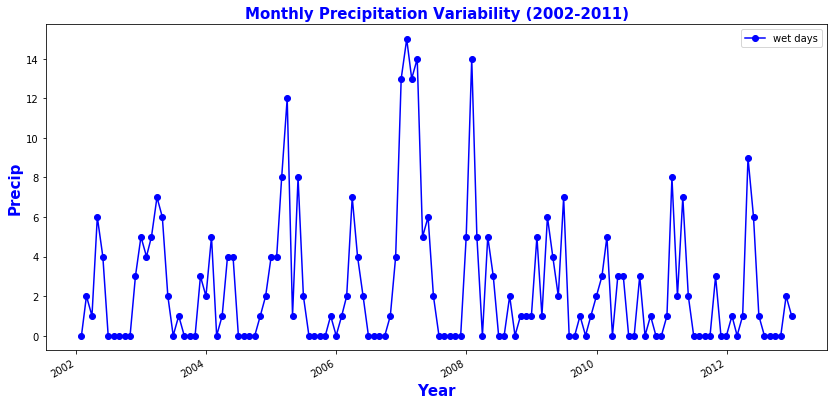

In [60]:
wdays_monthly = (afghan_data['precip']>=1).resample(datetime='1M').sum()
fig, ax = plt.subplots(figsize = (14,6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wdays_monthly.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='wet days')
ax.set_title('Monthly Precipitation Variability (2002-2011)',fontweight = 'bold', fontsize = 15,color='blue')
ax.set_xlabel('Year', fontweight = 'bold', fontsize = 15,color='blue')
ax.set_ylabel('Precip', fontweight = 'bold', fontsize = 15,color='blue')
plt.legend()
plt.show()

In [58]:
ddays_annual = (afghan_data['precip']< 1).resample(datetime='1Y').sum()
wdays_annual = (afghan_data['precip']>=1).resample(datetime='1Y').sum()

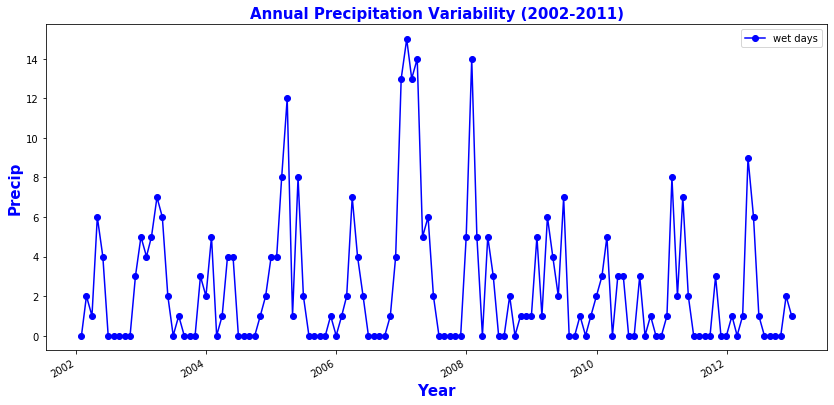

In [62]:
wdays_annual = (afghan_data['precip']>=1).resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize = (14,6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wdays_monthly.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='wet days')
ax.set_title('Annual Precipitation Variability (2002-2011)',fontweight = 'bold', fontsize = 15,color='blue')
ax.set_xlabel('Year', fontweight = 'bold', fontsize = 15,color='blue')
ax.set_ylabel('Precip', fontweight = 'bold', fontsize = 15,color='blue')
plt.legend()
plt.show()